# Análisis Exploratorio de Datos (EDA)

En este notebook analizamos la base de datos de accidentes en Madrid.

In [18]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from eda import (
    cargar_datos, accidentes_unicos, plot_accidentes_por_ano, 
    plot_accidentes_por_tipo, plot_accidentes_por_dia_semana,
    plot_accidentes_por_tramo_edad, plot_personas_involucradas,
    plot_accidentes_por_distrito, resumen_estadisticas
)


In [20]:
# Cargar y preparar datos
datos = cargar_datos("../data/processed/datos_abril_evolve.csv")

## ¿Qué tipo de datos tenemos?

In [21]:
print(datos.dtypes)

FECHA             datetime64[ns]
RANGO_HORARIO           category
TRAMO_EDAD              category
SEXO                    category
TIPO_PERSONA            category
DISTRITO                category
TIPO_ACCIDENTE          category
LESIVIDAD               category
TIPO_VEHICULO           category
AÑO                        int64
MES                     category
DIA_SEMANA              category
dtype: object


## Agrupamos accidentes únicos

Se consideran accidentes únicos por combinación de fecha, rango horario y distrito. Ya que, en lugar de contar a todos los involucrados, solo tenemos en cuenta el accidente.

In [22]:
accidentes_unicos_df = accidentes_unicos(datos)

## Conteo de accidentes únicos por año

In [23]:
conteo_accidentes_por_año = accidentes_unicos_df['AÑO'].value_counts().sort_index()
print(conteo_accidentes_por_año)

AÑO
2010     8570
2011     8652
2012     8707
2013     8694
2014     9126
2015     9253
2016     9660
2017     9913
2018    10128
2019    19294
2020    12715
2021    15932
2022    17947
2023    18330
2024    18327
Name: count, dtype: int64


## Tendencia de accidentes únicos por año

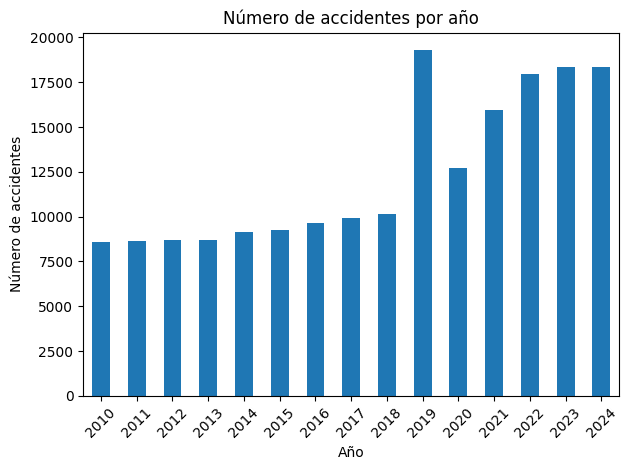

In [24]:
plot_accidentes_por_ano(conteo_accidentes_por_año)

El aumento de accidentes en 2019 se explica por el fuerte crecimiento de la actividad en Madrid ese año. Hubo más turismo, más eventos y más tráfico de reparto, lo que hizo que aumentara la movilidad en general. Además, empezaron a utilizarse más medios de transporte como los patinetes eléctricos y las bicicletas. También influyó la puesta en marcha de Madrid Central, que cambió la forma en que se movían los coches por la ciudad y provocó más tráfico en otras zonas, lo que pudo aumentar el número de accidentes.

Entre 2021 y 2024, el número de accidentes únicos siguió aumentando de manera constante. Este comportamiento refleja la recuperación plena de la actividad económica y social, un crecimiento demográfico sostenido en la Comunidad de Madrid y un incremento en la utilización de medios de transporte de diverso tipo.

## Conteo de accidentes por tipo de accidente

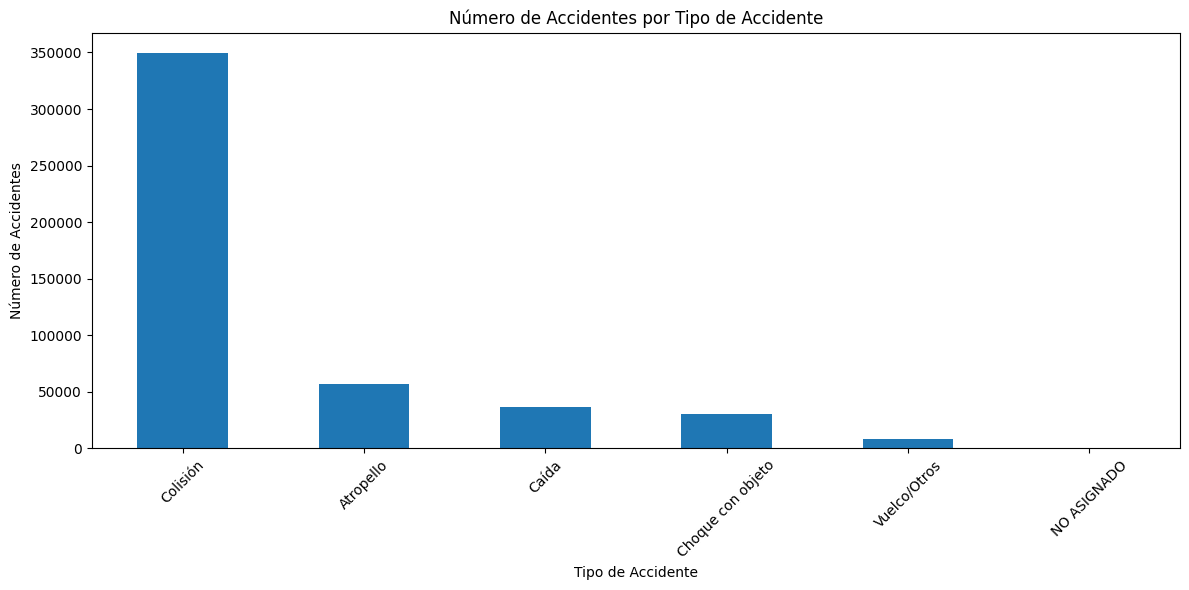

In [25]:
plot_accidentes_por_tipo(datos)

En este histograma se observa con una grán diferencia que el tipo de accidente más frecuente en la Comunidad de Madrid es la colisión entre vehiculos. 

Esta gráfica hace un recuento del total de accidentes desde el 2010 hasta el 2024 por tipo de accidente.

## Accidentes por día de la semana

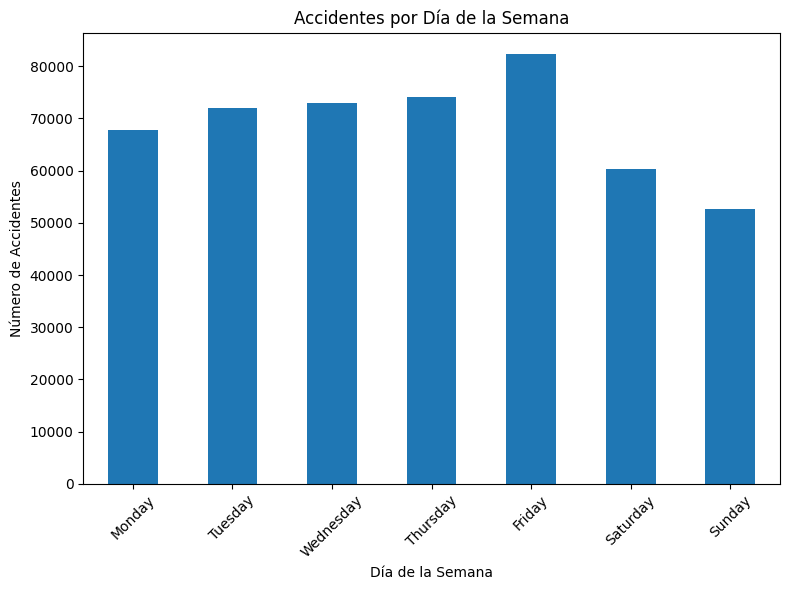

In [26]:
plot_accidentes_por_dia_semana(datos)

En este otro histograma se observa que entre semana debido a la alta movilidad en vehiculos para el trabajo, afecta en el número de accidentes. 

Los viernes observamos un pico de crecimiento quizás debido a que se junta la gente que utiliza estos vehiculos para ir a trabajar con los que se van de viaje y con los que disfrutan del ocio de la ciudad de Madrid.

Por otro lado, el fin de semana es donde ocurre una menor siniestralidad ya que la gente no utilizan tanto los vehiculos. Se observa que el domingo, históricamenete es el dia que menos accidentes tenemos en la Comunidad de Madrid.

## Accidentes por tramo de edad

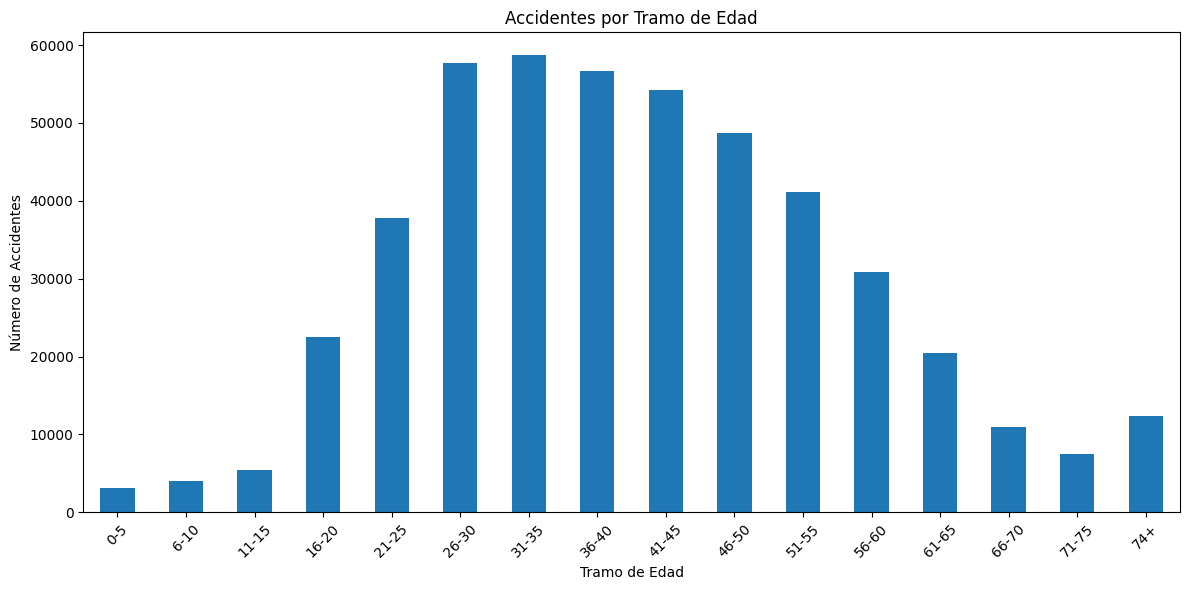

In [27]:
plot_accidentes_por_tramo_edad(datos)

En este gráfico de forma gaussiana observamos la edad de los implicados en los accidentes de tráfico, con una gran acumulación entre los individuos con edades comprendidas entre los 26 y los 45 años.

## Total de personas involucradas en accidentes por año

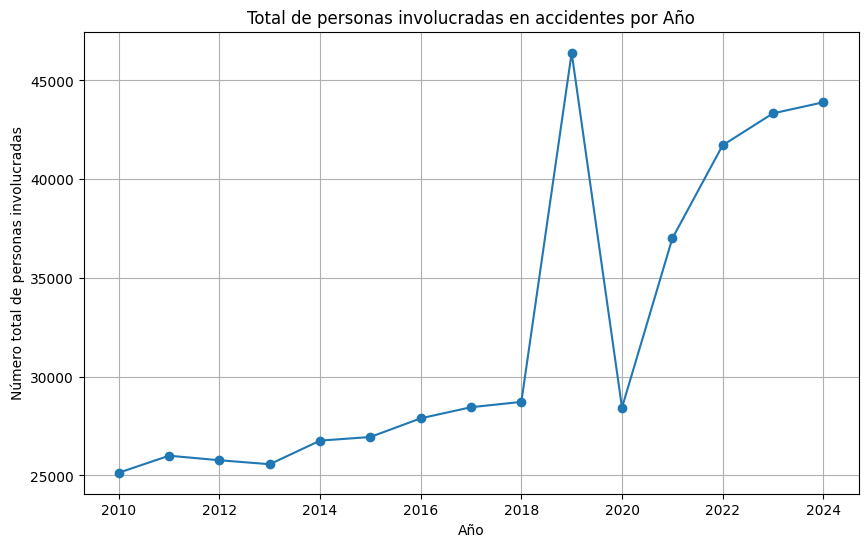

In [28]:
plot_personas_involucradas(datos)

Este análisis reproduce la estructura del primer histograma de la hoja, pero incorporando como variable de ponderación el número total de involucrados por accidente

## Conteo de accidentes únicos por distrito

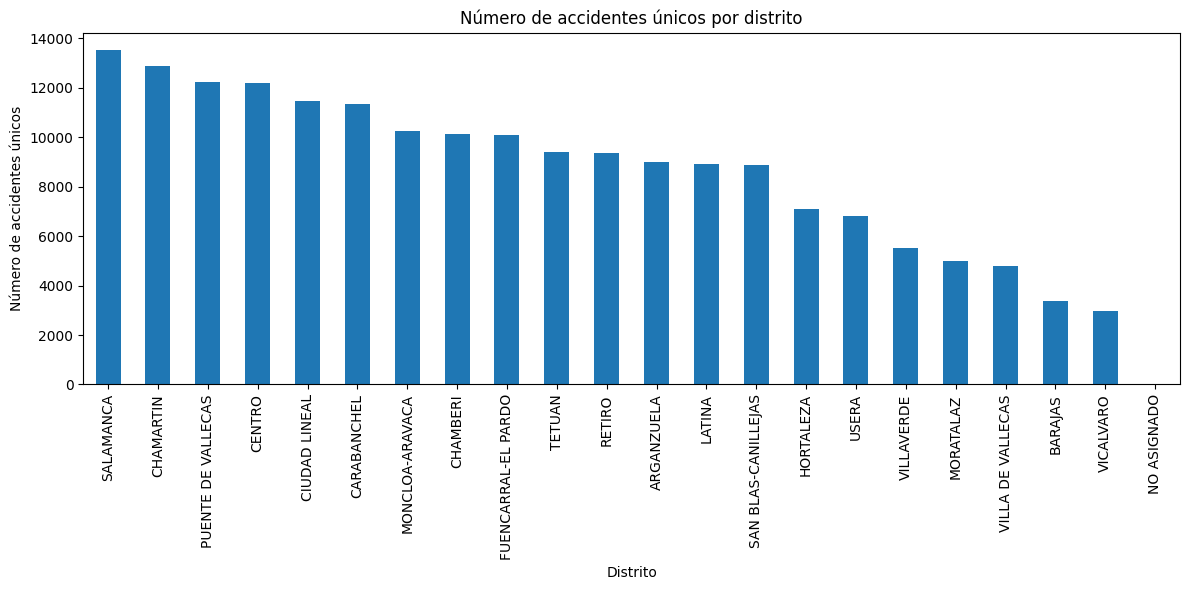

DISTRITO
SALAMANCA              13542
CHAMARTIN              12880
PUENTE DE VALLECAS     12238
CENTRO                 12174
CIUDAD LINEAL          11447
CARABANCHEL            11330
MONCLOA-ARAVACA        10261
CHAMBERI               10119
FUENCARRAL-EL PARDO    10078
TETUAN                  9404
RETIRO                  9379
ARGANZUELA              9014
LATINA                  8922
SAN BLAS-CANILLEJAS     8877
HORTALEZA               7106
USERA                   6811
VILLAVERDE              5514
MORATALAZ               4997
VILLA DE VALLECAS       4810
BARAJAS                 3358
VICALVARO               2984
NO ASIGNADO                3
Name: count, dtype: int64


In [29]:
conteo_distrito = plot_accidentes_por_distrito(accidentes_unicos_df)
print(conteo_distrito)

## Análisis de los distritos con más accidentes históricos (2010-2024)

Los tres distritos con mayor número de accidentes únicos registrados históricamente son:

1. **SALAMANCA (13,542 accidentes)**  
    El distrito de Salamanca es una de las zonas más transitadas de Madrid, conocida por su actividad comercial, oficinas y alta densidad de tráfico. La presencia de avenidas principales como la Calle de Alcalá y la M-30 contribuye al elevado número de accidentes. Además, su carácter residencial y comercial genera un flujo constante de vehículos y peatones, aumentando la probabilidad de siniestros.

2. **CHAMARTÍN (12,880 accidentes)**  
    Chamartín alberga importantes infraestructuras como la estación de tren de Chamartín y grandes arterias como el Paseo de la Castellana. Estas características lo convierten en un punto clave de movilidad en la ciudad, con un alto volumen de tráfico diario. La combinación de transporte público, privado y zonas residenciales densas incrementa la incidencia de accidentes.

3. **PUENTE DE VALLECAS (12,238 accidentes)**  
    Este distrito es una de las áreas más pobladas de Madrid, con una mezcla de zonas residenciales y comerciales. Su proximidad a vías principales como la A-3 y la M-30 genera un tráfico intenso, especialmente en horas pico. Además, la alta densidad de población y el uso frecuente de vehículos particulares contribuyen al elevado número de accidentes.

### Factores comunes:
- **Alta densidad de población y actividad económica:** Estos distritos concentran una gran cantidad de personas y actividades comerciales, lo que incrementa el flujo vehicular y peatonal.
- **Infraestructuras clave:** La presencia de avenidas principales y conexiones con otras áreas de la ciudad genera un tráfico constante y, en ocasiones, congestionado.
- **Movilidad mixta:** La coexistencia de transporte público, privado, bicicletas y peatones aumenta la complejidad del tráfico y el riesgo de accidentes.

Estos datos reflejan la importancia de implementar medidas de seguridad vial, como mejoras en la señalización, campañas de concienciación y optimización del diseño urbano, para reducir la siniestralidad en estas zonas críticas.

## Número de accidentes únicos por distrito y año

In [31]:
accidentes_por_distrito_anyo = accidentes_unicos_df.groupby(['DISTRITO', 'AÑO']).size().unstack(fill_value=0)
print(accidentes_por_distrito_anyo)

AÑO                  2010  2011  2012  2013  2014  2015  2016  2017  2018  \
DISTRITO                                                                    
ARGANZUELA            454   431   436   439   470   475   486   507   507   
BARAJAS               110   128   123   118   121   144   163   182   183   
CARABANCHEL           501   529   534   519   565   551   550   610   562   
CENTRO                632   608   639   590   662   689   669   694   700   
CHAMARTIN             640   649   626   606   638   708   690   690   728   
CHAMBERI              496   530   531   537   557   545   525   594   585   
CIUDAD LINEAL         580   571   528   581   556   588   609   630   608   
FUENCARRAL-EL PARDO   477   500   524   520   511   509   555   521   529   
HORTALEZA             273   290   271   307   332   353   376   391   368   
LATINA                440   409   429   399   432   459   488   490   458   
MONCLOA-ARAVACA       544   506   519   518   491   512   512   498   578   

En esta tabla encontramos los datos de los accidnetes de tráfico en la Comunidad de Madrid segmentados por año y por distrito.